#Iris Dataset

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from sklearn.datasets import load_iris

In [49]:
iris = pd.read_csv('iris.csv')

print(iris)
# print(iris.to_string())

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [50]:
iris.isnull().sum(axis=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [51]:
iris.drop('species', axis=1).skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

In [52]:
filt = (iris['species'] == 'setosa')
df_setosa = iris.loc[filt]
filt = (iris['species'] == 'versicolor')
df_versicolor = iris.loc[filt]
filt = (iris['species'] == 'virginica')
df_virginica = iris.loc[filt]

In [53]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
q1 = iris.quantile(0.25)
q3 = iris.quantile(0.75)
iqr = q3 - q1

r1 = q1 - 1.5 * iqr
r2 = q3 + 1.5 * iqr

print("Q1:")
print(q1)
print("Q3:")
print(q3)
print("IQR:")
print(iqr)
print("Rango outlayers (inferior):")
print(r1)
print("Rango outlayers (superior):")
print(r2)


Q1:
sepal_length    5.1
sepal_width     2.8
petal_length    1.6
petal_width     0.3
Name: 0.25, dtype: float64
Q3:
sepal_length    6.4
sepal_width     3.3
petal_length    5.1
petal_width     1.8
Name: 0.75, dtype: float64
IQR:
sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64
Rango outlayers (inferior):
sepal_length    3.15
sepal_width     2.05
petal_length   -3.65
petal_width    -1.95
dtype: float64
Rango outlayers (superior):
sepal_length     8.35
sepal_width      4.05
petal_length    10.35
petal_width      4.05
dtype: float64


<ipython-input-54-841e1dd0db00>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = iris.quantile(0.25)
<ipython-input-54-841e1dd0db00>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = iris.quantile(0.75)


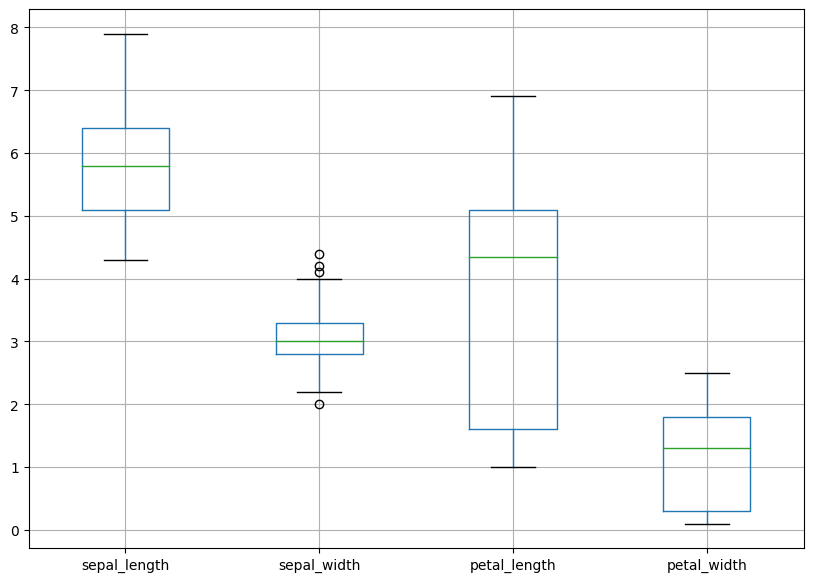

In [55]:
plt.figure(figsize=(10,  7))
iris.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

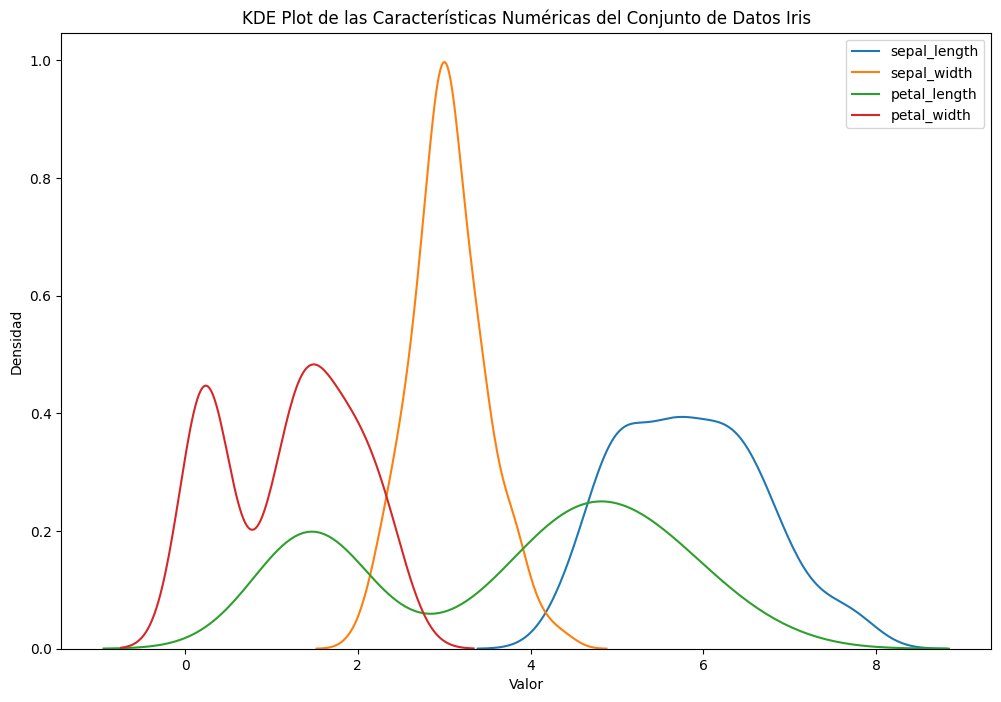

In [56]:
numeric_columns = iris.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
for column in numeric_columns.columns:
    sns.kdeplot(data=numeric_columns[column], label=column)

plt.title('KDE Plot de las Características Numéricas del Conjunto de Datos Iris')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

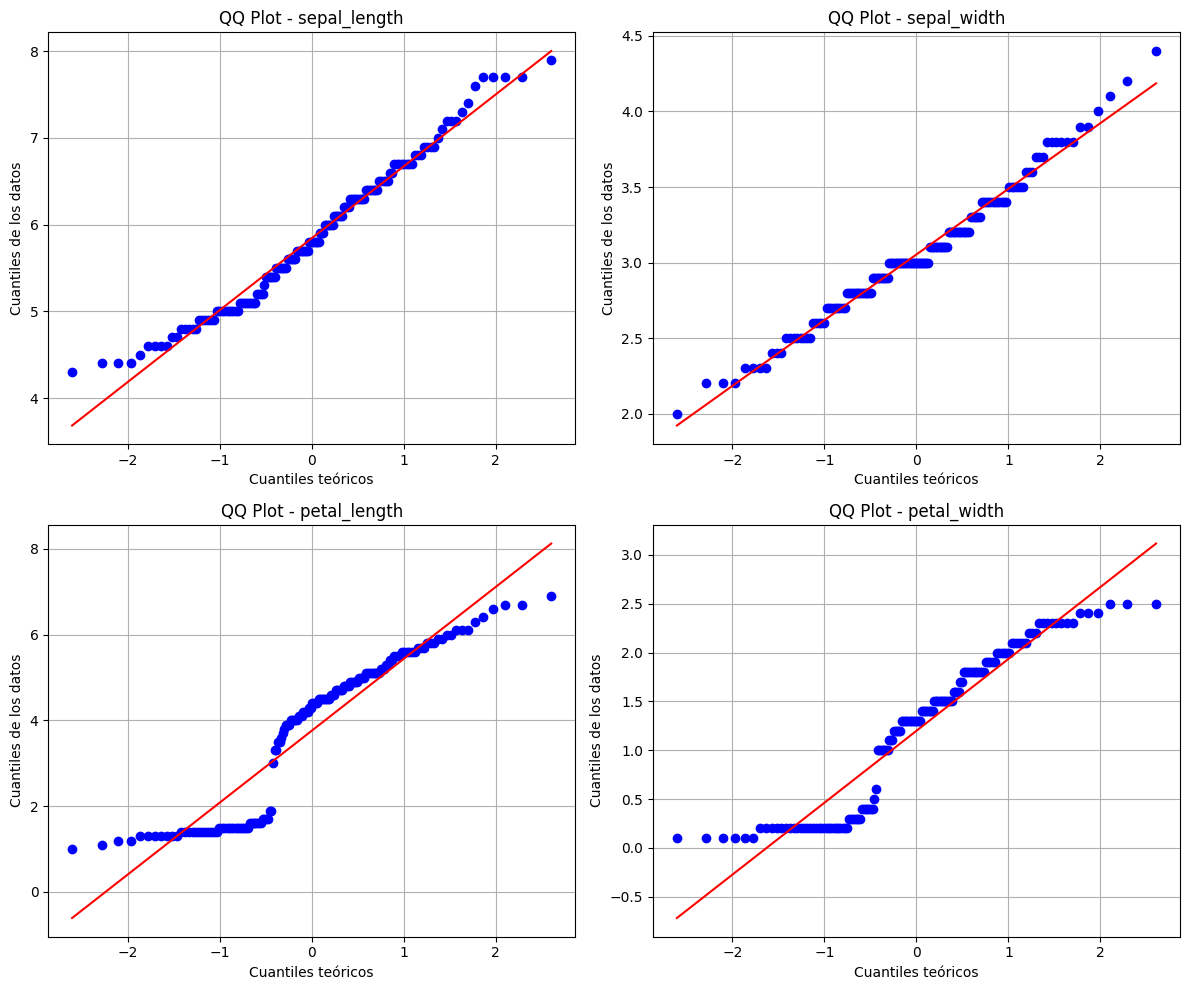

In [57]:
columnas = iris.columns[:-1]

num_columnas = len(columnas)
num_filas = int(np.ceil(num_columnas / 2))
fig, axs = plt.subplots(num_filas, 2, figsize=(12, num_filas * 5))

for i, columna in enumerate(columnas):
    fila = i // 2
    columna_sub = i % 2
    ax = axs[fila, columna_sub]

    datos = iris[columna]
    res = stats.probplot(datos, dist="norm", plot=ax)
    ax.get_lines()[1].set_color('red')
    ax.set_title(f'QQ Plot - {columna}')
    ax.set_xlabel('Cuantiles teóricos')
    ax.set_ylabel('Cuantiles de los datos')
    ax.grid(True)

plt.tight_layout()
plt.show()


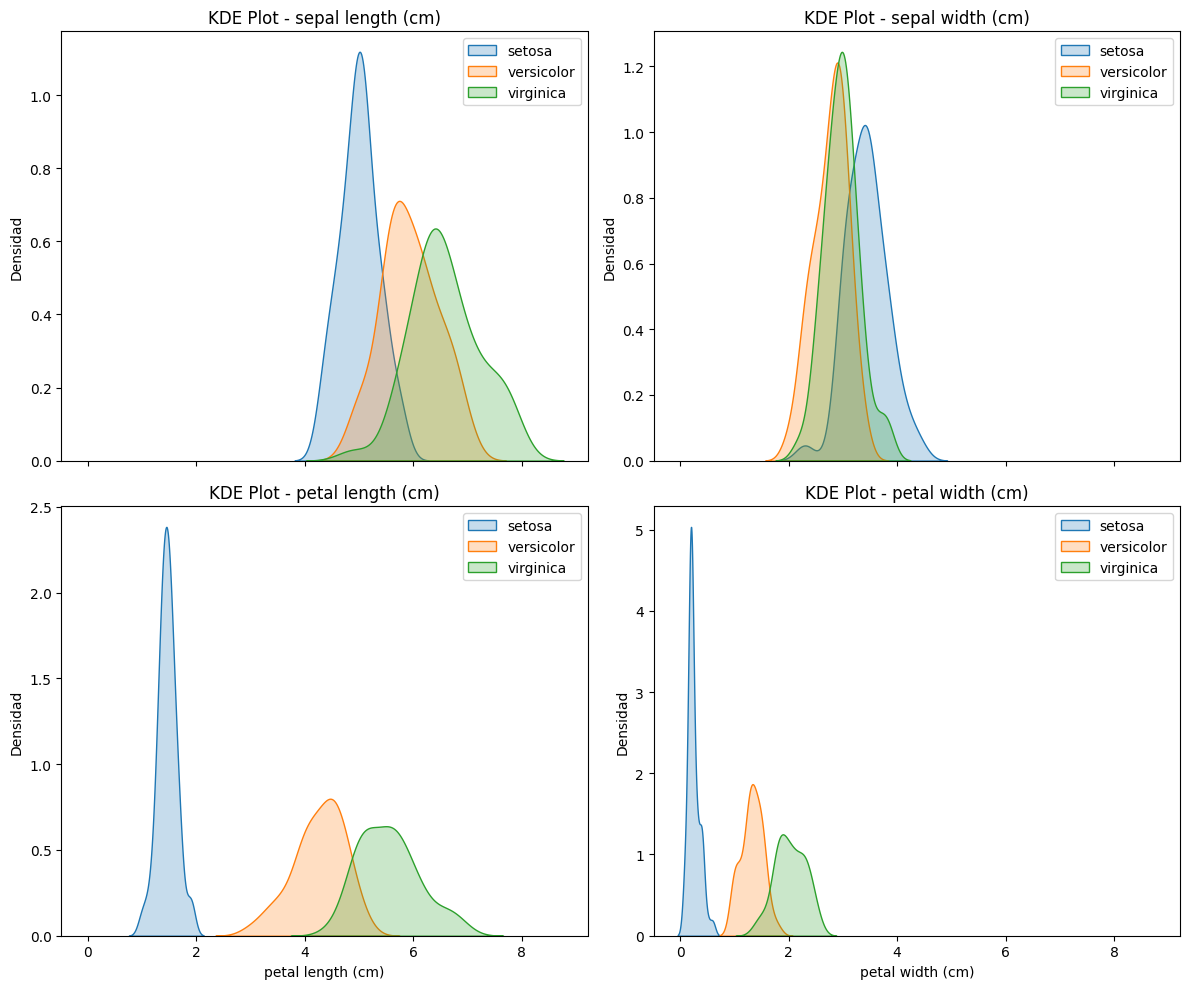

In [58]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
target_names = iris.target_names

num_columnas = len(iris_df.columns[:-1])
num_filas = int(np.ceil(num_columnas / 2))

fig, axs = plt.subplots(num_filas, 2, figsize=(12, num_filas * 5), sharex=True)

for i, columna in enumerate(iris_df.columns[:-1]):
    fila = i // 2
    columna_sub = i % 2
    ax = axs[fila, columna_sub]

    for clase, target_name in enumerate(target_names):
        datos = iris_df[iris_df['target'] == clase][columna]
        sns.kdeplot(data=datos, label=target_name, fill=True, ax=ax)

    ax.set_title(f'KDE Plot - {columna}')
    ax.set_xlabel(columna)
    ax.set_ylabel('Densidad')
    ax.legend()

plt.tight_layout()
plt.show()

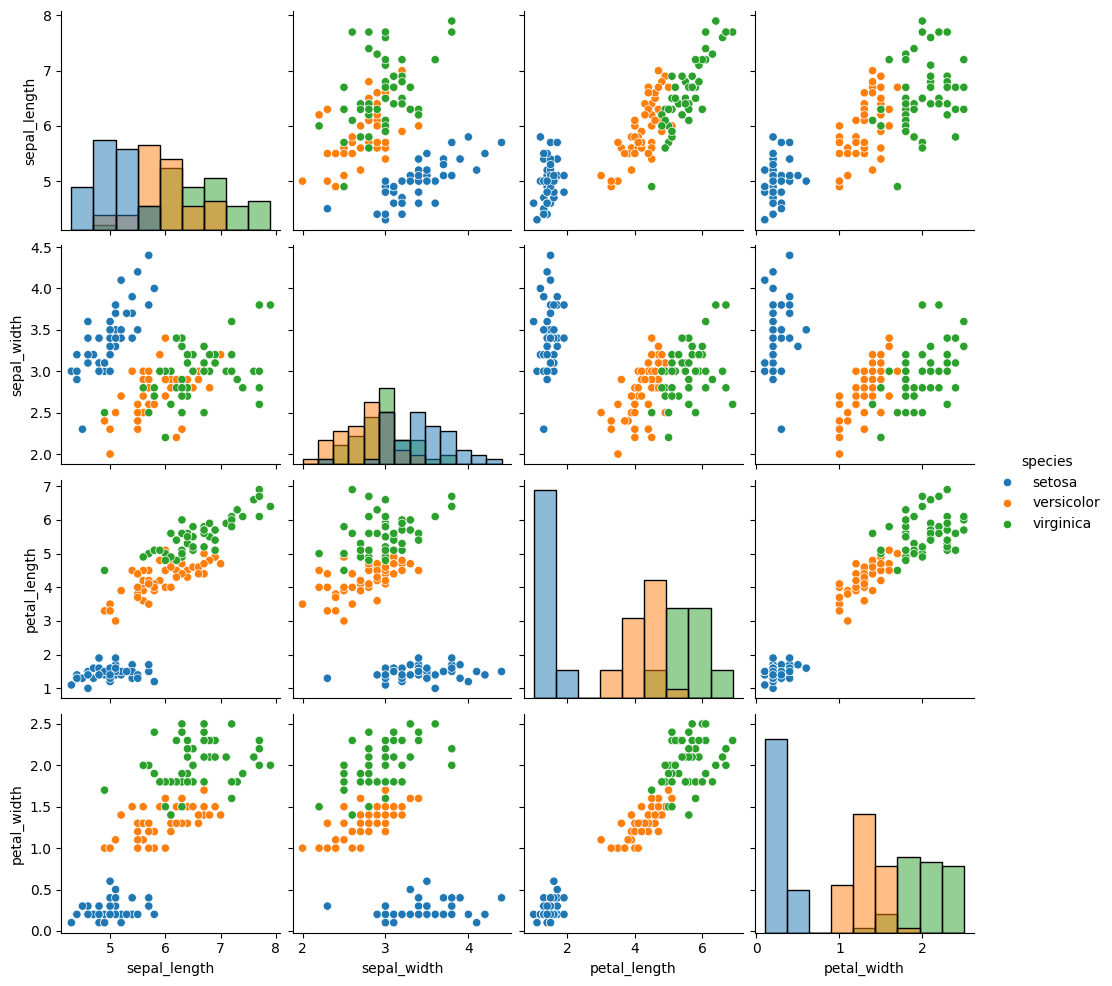

In [59]:
iris = pd.read_csv('iris.csv')
sns.pairplot(iris, hue="species", diag_kind="hist")